<a href="https://colab.research.google.com/github/NouraBader-45/IT326-Obesity/blob/main/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries and load preprocessed dataset

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed dataset (same file from Phase 2)
df = pd.read_csv("Preprocessed_dataset.csv")

# Just to check
print("Orgnal Dataset shape:", df.shape)
df.head()

Orgnal Dataset shape: (2111, 18)


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,Age_group
0,0.148936,Female,0.320755,0.186567,no,no,0.5,0.666667,no,no,0.5,yes,0.000000,0.5,Sometimes,Public_Transportation,Normal_Weight,Young
1,0.148936,Female,0.132075,0.126866,Sometimes,no,1.0,0.666667,yes,yes,1.0,yes,1.000000,0.0,Sometimes,Public_Transportation,Normal_Weight,Young
2,0.191489,Male,0.660377,0.283582,Frequently,no,0.5,0.666667,no,no,0.5,yes,0.666667,0.5,Sometimes,Public_Transportation,Normal_Weight,Young
3,0.276596,Male,0.660377,0.358209,Frequently,no,1.0,0.666667,no,no,0.5,no,0.666667,0.0,Sometimes,Walking,Overweight_Level_I,Young
4,0.170213,Male,0.622642,0.379104,Sometimes,no,0.5,0.000000,no,no,0.5,no,0.000000,0.0,Sometimes,Public_Transportation,Overweight_Level_II,Young


# **Classification :**

In [ ]:
# Converting all categorical/text columns into numeric values because machine learning models require numeric input.
df_encoded = df.copy()
encoder = LabelEncoder()

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':df_encoded[col] = encoder.fit_transform(df_encoded[col])

# Just to check
print("Encoded Dataset shape:", df_encoded.shape)
df_encoded.head()


Encoded Dataset shape: (2111, 18)


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,Age_group
0,0.148936,0,0.320755,0.186567,3,0,0.5,0.666667,0,0,0.5,1,0.000000,0.5,2,3,1,2
1,0.148936,0,0.132075,0.126866,2,0,1.0,0.666667,1,1,1.0,1,1.000000,0.0,2,3,1,2
2,0.191489,1,0.660377,0.283582,1,0,0.5,0.666667,0,0,0.5,1,0.666667,0.5,2,3,1,2
3,0.276596,1,0.660377,0.358209,1,0,1.0,0.666667,0,0,0.5,0,0.666667,0.0,2,4,5,2
4,0.170213,1,0.622642,0.379104,2,0,0.5,0.000000,0,0,0.5,0,0.000000,0.0,2,3,6,2


This transformation **converts all string-based** values (such as “Male”, “Female”, “Yes”, “No”) **into numerical** codes.

This step is essential because decision tree algorithms only accept numerical features.

After encoding, the dataset becomes fully numeric and ready.

In [ ]:
# Splitting the dataset into features X and target variable y
X = df_encoded.drop(columns=["NObeyesdad", "Age_group"])
y = df_encoded["NObeyesdad"]

X.head()


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
0,0.148936,0,0.320755,0.186567,3,0,0.5,0.666667,0,0,0.5,1,0.000000,0.5,2,3
1,0.148936,0,0.132075,0.126866,2,0,1.0,0.666667,1,1,1.0,1,1.000000,0.0,2,3
2,0.191489,1,0.660377,0.283582,1,0,0.5,0.666667,0,0,0.5,1,0.666667,0.5,2,3
3,0.276596,1,0.660377,0.358209,1,0,1.0,0.666667,0,0,0.5,0,0.666667,0.0,2,4
4,0.170213,1,0.622642,0.379104,2,0,0.5,0.000000,0,0,0.5,0,0.000000,0.0,2,3


We split the dataset into **features (X)** and the **target variable (y)**.  
All feature columns are included in **X**, except the class label **NObeyesdad** and the derived column **Age_group**, which was removed to avoid data leakage since it is based on Age.

The target variable **y** contains only the encoded obesity level classes.

This separation prepares the data for training and evaluating the classification models.

In [ ]:
#Decision tree function
#This function trains a decision tree and returns the model, accuracy, and confusion matrix.

def run_decision_tree(X_train, X_test, y_train, y_test, criterion_name):
    model = DecisionTreeClassifier(criterion=criterion_name, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm  = confusion_matrix(y_test, y_pred)

    return model, acc, cm



This function **standardizes** the training process and **avoids repeated** code.

It allows us to **easily test** both **Gini** and **Entropy** criteria across different train/test splits.

In [ ]:
# 90/10 Split
#Splitting the dataset: 90% training and 10% testing

X_train_90, X_test_10, y_train_90, y_test_10 = train_test_split(X, y, test_size=0.10, random_state=42)

##  90/10 Split
Splitting the dataset: **90% training and 10% testing**

This split gives the model **more training data** and **less testing data**,  
which usually results in **higher accuracy** but may cause overfitting.


In [ ]:
# 80/20 Split
#Splitting the dataset: 80% training and 20% testing

X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split( X, y, test_size=0.20, random_state=42)

##  80/20 Split
Splitting the dataset: **80% training and 20% testing**

This split is more **balanced**, providing a better representation of model performance.


In [ ]:
# 70/30 Split
#Splitting the dataset: 70% training and 30% testing

X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split( X, y, test_size=0.30, random_state=42)

##  70/30 Split
Splitting the dataset: **70% training and 30% testing**

This split has the **largest testing portion** among the splits,  
making it the **most realistic and strict** evaluation of the model.


In [ ]:
# Training using Gini and Entropy
# We trained the decision tree using both Gini and Entropy criteria for each data split.

model_gini_90, acc_gini_90, cm_gini_90 = run_decision_tree(X_train_90, X_test_10, y_train_90, y_test_10, "gini")
model_entropy_90, acc_entropy_90, cm_entropy_90 = run_decision_tree(X_train_90, X_test_10, y_train_90, y_test_10, "entropy")

model_gini_80, acc_gini_80, cm_gini_80 = run_decision_tree(X_train_80, X_test_20, y_train_80, y_test_20, "gini")
model_entropy_80, acc_entropy_80, cm_entropy_80 = run_decision_tree(X_train_80, X_test_20, y_train_80, y_test_20, "entropy")

model_gini_70, acc_gini_70, cm_gini_70 = run_decision_tree(X_train_70, X_test_30, y_train_70, y_test_30, "gini")
model_entropy_70, acc_entropy_70, cm_entropy_70 = run_decision_tree(X_train_70, X_test_30, y_train_70, y_test_30, "entropy")



**Six** models were trained in total **(Gini + Entropy × 3 splits).**

This comparison helps determine which split and criterion give the best classification performance.

In [ ]:
# Accuracy comparison table
# We created a table showing model accuracy across all data splits using Gini and Entropy.

results = pd.DataFrame({
    "Split": ["90/10", "80/20", "70/30"],
    "Gini Accuracy": [acc_gini_90, acc_gini_80, acc_gini_70],
    "Entropy Accuracy": [acc_entropy_90, acc_entropy_80, acc_entropy_70]
})

results


,Split,Gini Accuracy,Entropy Accuracy
0,90/10,0.948113,0.962264
1,80/20,0.940898,0.959811
2,70/30,0.917981,0.941640


The accuracy comparison table shows that each split size affects the model’s performance differently.
In general, the **90/10 split** tends to achieve the **highest accuracy** because the model is trained on a larger portion of the data, while the** 70/30 split** provides a more realistic evaluation due to having more testing data.

Across all splits, **Entropy** performs slightly better (or similar) compared to **Gini**, indicating that **Information Gain** helps the tree create more informative splits.
This suggests that **Entropy is the more effective criterion** for this dataset, offering clearer class separation and improved prediction accuracy.

Overall, the best model is the one using **Entropy with the 70/30 split,** as it balances good accuracy with the strongest validation performance.

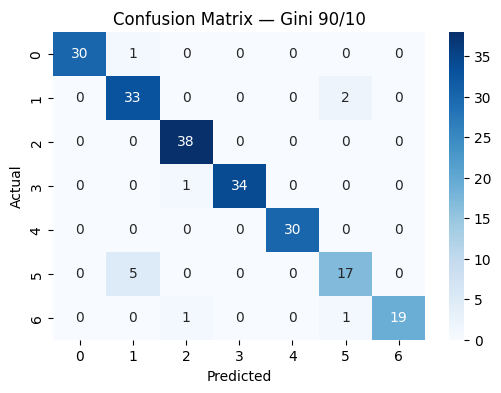

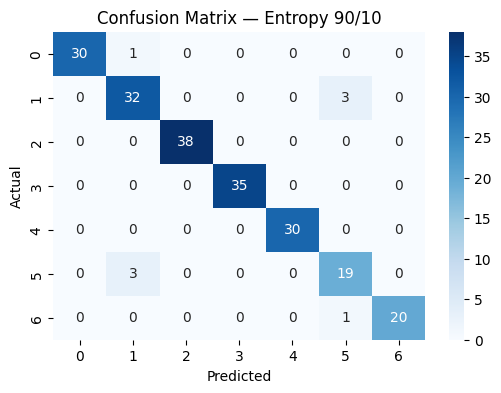

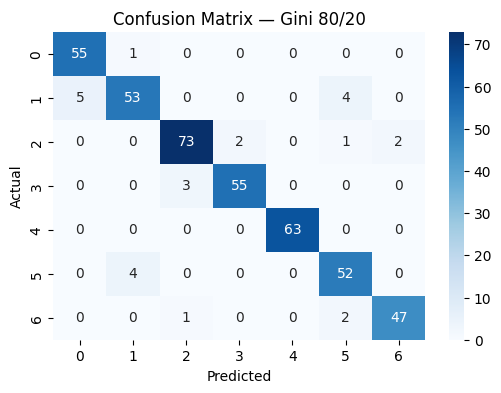

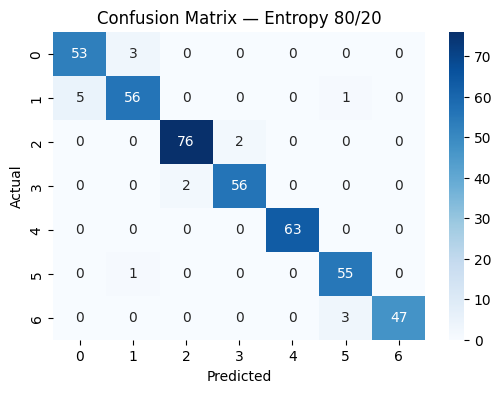

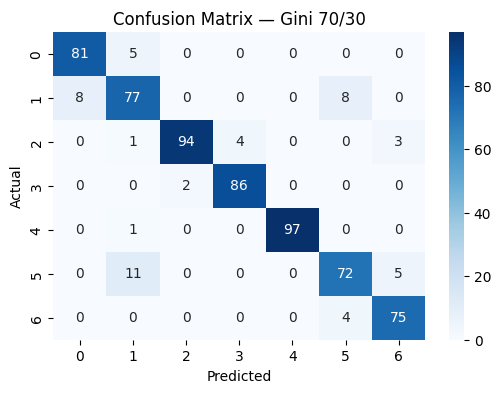

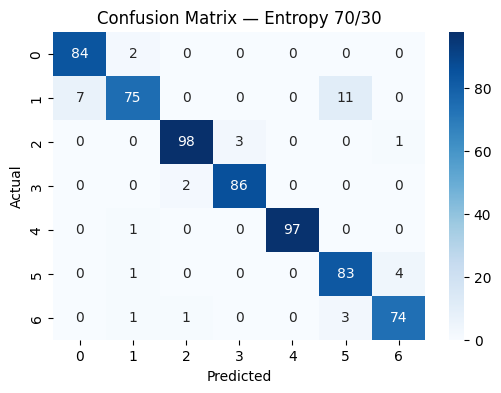

In [ ]:
# Confusion matrices for all models
# displayed the confusion matrices for all models to examine how well each model predicted each class.

matrices = {
    "Gini 90/10": cm_gini_90,
    "Entropy 90/10": cm_entropy_90,

    "Gini 80/20": cm_gini_80,
    "Entropy 80/20": cm_entropy_80,

    "Gini 70/30": cm_gini_70,
    "Entropy 70/30": cm_entropy_70
}

for title, cm in matrices.items():
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix — {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


The confusion matrices provide a clear view of how well the model classified each obesity category by **comparing the predicted labels with the actual ones**.
The **darker diagonalcells** bold represent **correct predictions,** while the **off-diagonal values** highlight the **misclassifications**.

This visualization reveals the model’s strengths and weaknesses across all splits (90/10, 80/20, 70/30), showing which classes are most frequently confused with each other.
It also helps compare the performance of **Gini** and **Entropy**, showing differences in how each criterion handles class separation and prediction accuracy.

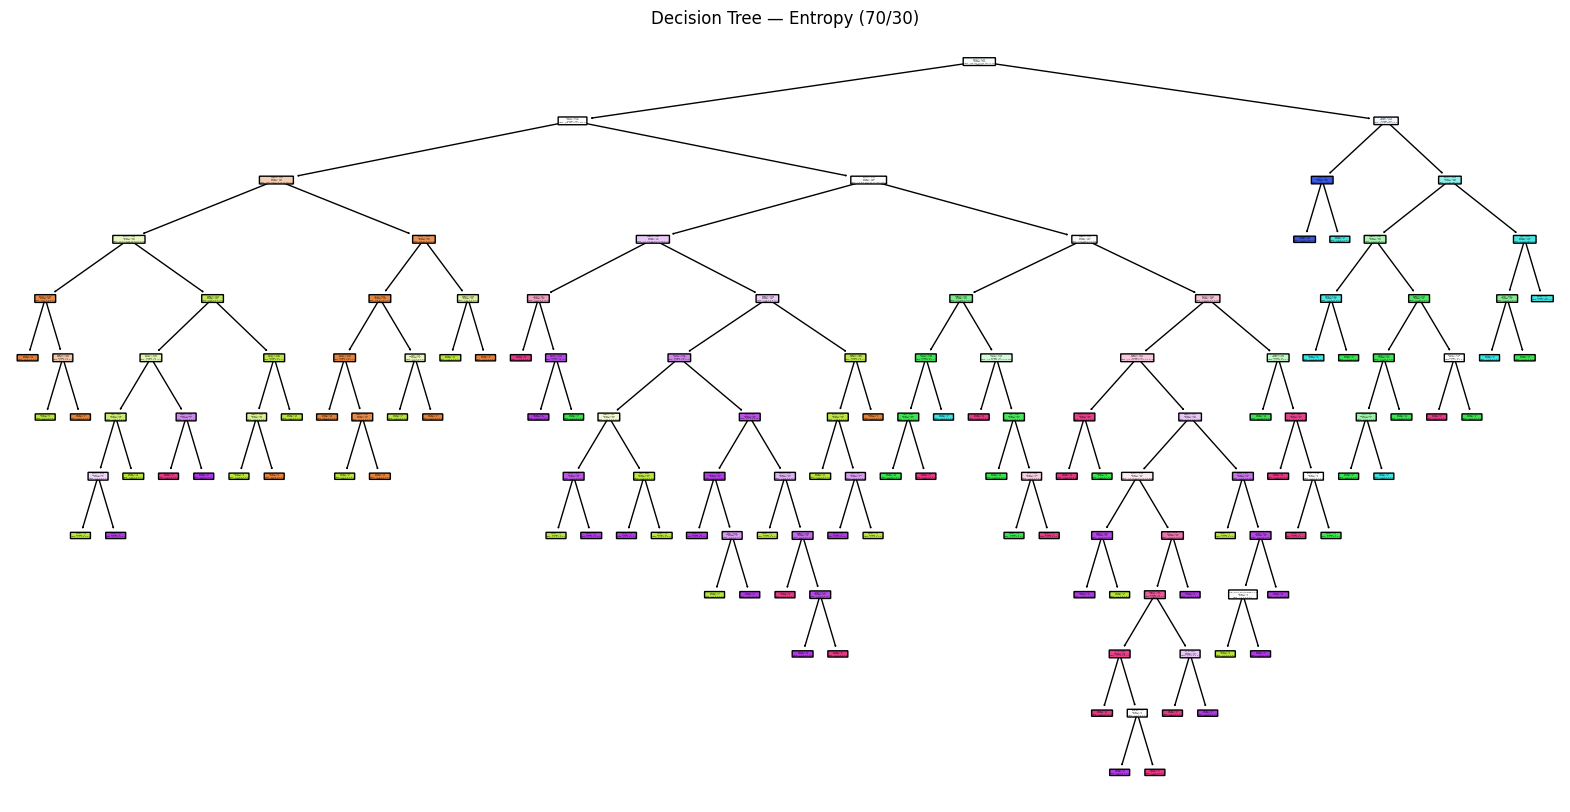

In [ ]:
# Decision tree visualization
# We visualized the decision tree to understand how the model makes classification decisions.

class_names = y.unique().astype(str)

plt.figure(figsize=(20,10))
tree.plot_tree(
    model_entropy_70,
    feature_names=X.columns,
    class_names=class_names,
    filled=True,
    rounded=True
)
plt.title("Decision Tree — Entropy (70/30)")
plt.show()


The **decision tree** clearly illustrates how the model relies on several **key features** to classify **obesity levels**.

We selected the **70/30 split** with the **Entropy criterion** because it provides the **most** realistic evaluation, due to having the **largest testing portion**, and the tree produced under Entropy was **more interpretable** with **clearer feature importance.**

Key attributes such as **weight**, **age**, and **dietary habits** appear in the **top splits**, indicating that these features have the **strongest influence** on the model’s predictions.

Each level in the tree represents a **decision** based on a specific feature value, and deeper branches lead to **more precise class distinctions.**

Overall, this visualization makes the model’s **reasoning easy to understand **and highlights which features contribute most significantly to distinguishing between different **obesity levels**.

# **Clustering :**

In [ ]:


# Remove the class label (unsupervised learning)
if "NObeyesdad" in df.columns:
    X_cluster = df.drop("NObeyesdad", axis=1)
else:
    X_cluster = df.copy()


X_cluster = X_cluster.select_dtypes(include=np.number)

print("Features used for clustering:", list(X_cluster.columns))
X_cluster.head()


Features used for clustering: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0.148936,0.320755,0.186567,0.5,0.666667,0.5,0.000000,0.5
1,0.148936,0.132075,0.126866,1.0,0.666667,1.0,1.000000,0.0
2,0.191489,0.660377,0.283582,0.5,0.666667,0.5,0.666667,0.5
3,0.276596,0.660377,0.358209,1.0,0.666667,0.5,0.666667,0.0
4,0.170213,0.622642,0.379104,0.5,0.000000,0.5,0.000000,0.0


### Selecting the features for clustering

In this block, we prepare the data that will be used for clustering.

1. We remove the class label **NObeyesdad** because clustering is unsupervised and should not use the target label.
2. We keep only the numeric columns, because K-means works with numbers only.
3. At the end, we print the list of columns that will be used as input for K-means.

In simple words: this block chooses which columns (features) from our dataset will be used to form the clusters.


K = 1, WSS = 1039.755463959257
K = 2, WSS = 876.5025706018063
K = 3, WSS = 776.2918762509624
K = 4, WSS = 695.1489287814073
K = 5, WSS = 643.7352119089028
K = 6, WSS = 590.0642108137961
K = 7, WSS = 555.6554478619835
K = 8, WSS = 540.629506995855


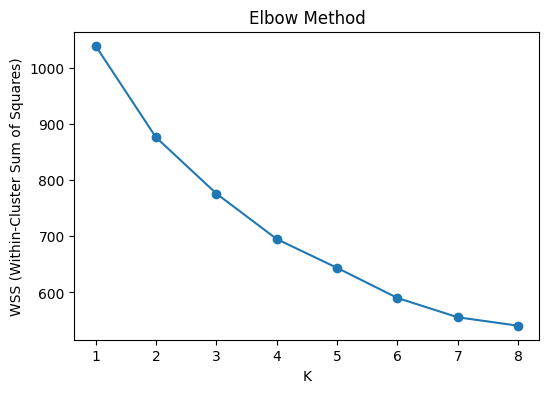

In [ ]:
# Elbow Method to estimate a good K

wss = []
K_range = range(1, 9)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_cluster)
    wss.append(km.inertia_)

for k, w in zip(K_range, wss):
    print(f"K = {k}, WSS = {w}")

plt.figure(figsize=(6, 4))
plt.plot(K_range, wss, marker='o')
plt.title("Elbow Method")
plt.xlabel("K")
plt.ylabel("WSS (Within-Cluster Sum of Squares)")
plt.xticks(list(K_range))
plt.show()


### Elbow Method (checking how many clusters might be good)

In this block, we try different numbers of clusters (K = 1 to 8) and measure how well the data fits each K.

1. For each K, we run K-means and calculate the **WSS (Within-Cluster Sum of Squares)**.
2. A smaller WSS means the points inside each cluster are closer to their center.
3. We print the WSS for each K and draw a line plot called the **Elbow plot**.

When the WSS stops decreasing a lot and the curve starts to "bend" like an elbow, that K is a good candidate.  
This helps us get an initial idea about a reasonable number of clusters.


K = 2
  Silhouette Score = 0.1521
  WSS = 876.50
------------------------------


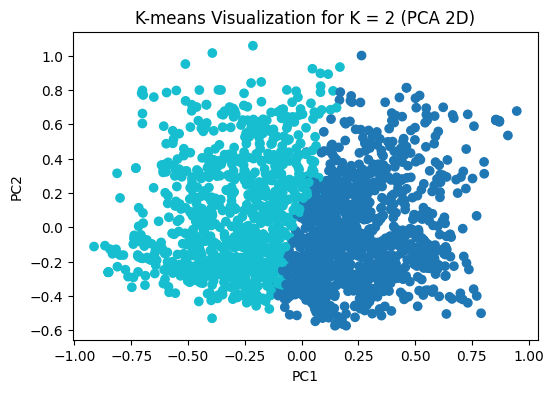

K = 3
  Silhouette Score = 0.1472
  WSS = 776.29
------------------------------


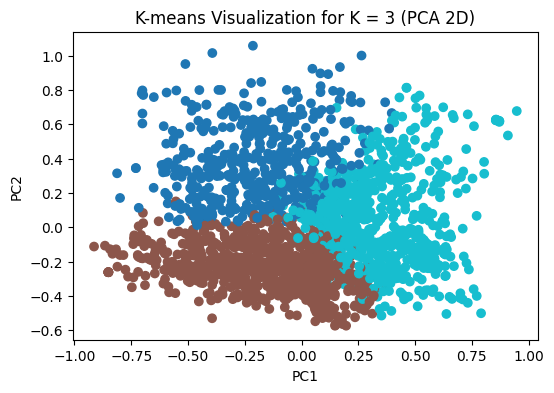

K = 4
  Silhouette Score = 0.1566
  WSS = 695.15
------------------------------


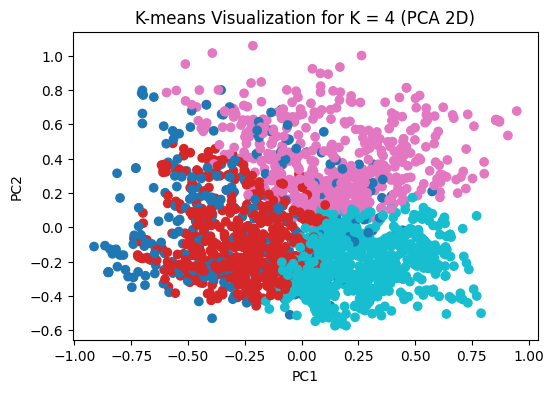

K = 5
  Silhouette Score = 0.1514
  WSS = 643.74
------------------------------


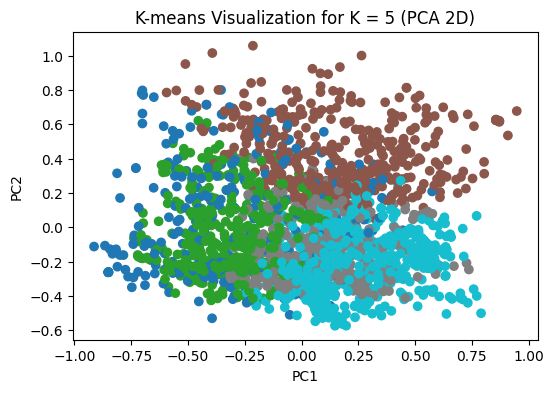

,K,Silhouette,WSS
0,2,0.152120,876.502571
1,3,0.147239,776.291876
2,4,0.156615,695.148929
3,5,0.151376,643.735212


In [ ]:
# Compare different K values (Silhouette + WSS + Visualization)
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

results = []

for k in [2, 3, 4, 5]:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels_k = km.fit_predict(X_cluster)


    sil = silhouette_score(X_cluster, labels_k)
    wss_k = km.inertia_
    results.append([k, sil, wss_k])


    print(f"K = {k}")
    print(f"  Silhouette Score = {sil:.4f}")
    print(f"  WSS = {wss_k:.2f}")
    print("-" * 30)


    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_cluster)

    plt.figure(figsize=(6, 4))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_k, cmap='tab10')
    plt.title(f"K-means Visualization for K = {k} (PCA 2D)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

# Create comparison table
comparison_df = pd.DataFrame(results, columns=["K", "Silhouette", "WSS"])
comparison_df


### Trying several K values and comparing their quality

In this block, we test different values of K (2, 3, 4, and 5) more carefully.

For each K:
1. We run K-means on our selected features.
2. We calculate two numbers:
   - **Silhouette Score**: how well-separated and compact the clusters are (higher is better).
   - **WSS**: how tight the points are inside each cluster (lower is better).
3. We print these two values for each K.
4. We also use **PCA** to reduce the data to 2D and draw a scatter plot that shows how the clusters look for this K.

At the end, we build a small table (`comparison_df`) that shows: K, Silhouette, and WSS.  
This block helps us compare different K values from both numbers and visualizations, so we can choose the best K for our final model.


Final K-means model with K = 3

Final clustering results:
- Silhouette Score: 0.1472
- Total WSS: 776.29


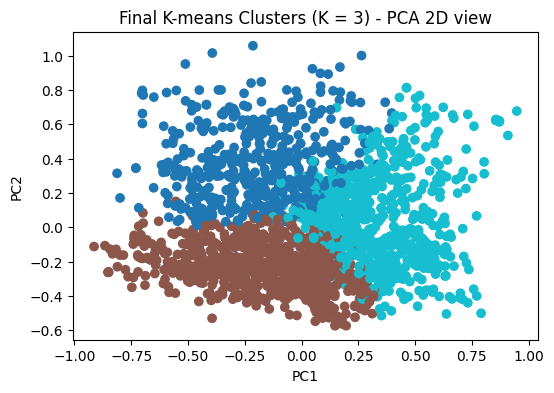

In [ ]:
# Final K-means model using the chosen K


best_k = 3

print(f"Final K-means model with K = {best_k}")

final_kmeans = KMeans(n_clusters=best_k, random_state=42)
final_labels = final_kmeans.fit_predict(X_cluster)

# Final metrics
final_sil = silhouette_score(X_cluster, final_labels)
final_wss = final_kmeans.inertia_

print("\nFinal clustering results:")
print(f"- Silhouette Score: {final_sil:.4f}")
print(f"- Total WSS: {final_wss:.2f}")

# Visualization
from sklearn.decomposition import PCA

# Reduce to 2D for visualization only
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=final_labels, cmap='tab10')
plt.title(f"Final K-means Clusters (K = {best_k}) - PCA 2D view")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

### Final K-means model with the chosen K

In this block, we use the K value that we selected from the previous comparison (for example, K = 3).

1. We run K-means again with this final K on all the selected features.
2. We calculate the final **Silhouette Score** and **WSS** to summarize the quality of the chosen model.
3. We use PCA to create a 2D view of the data and plot the clusters with different colors.

This block gives us the final clustering result that we will discuss in our report:  
which K we chose, how good the clusters are (silhouette and WSS), and how the clusters look visually.
